In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2018-08-01 15:41:01.205521


#### Current runs for implementation

In [5]:
runs = [
    'run_0100'
]

#### Check that all run files are up-to-date

In [6]:
for r in runs:
    run = RunManager('StatArbStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0100 - 2018-07-31 00:00:00


#### Import

In [7]:
drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('per_side_count', 20), ('score_var', 'prma_20')]

run1 = RunManager('StatArbStrategy', 'run_0100', drop_params=drop_params, test_periods=0)

## Create combo search
comb = CombinationSearch(write_flag=True)
comb.set_selection_criteria('sharpe')
comb.params['training_epochs'] = 20

#for r in runs:
comb.add_run(run1)

In [8]:
comb.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180801154154
Max date: 2018-07-31
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [06:26<00:00, 18.92s/it]


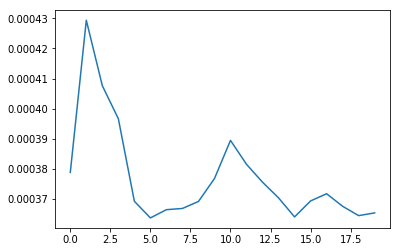

In [9]:
plt.figure()
plt.plot(comb.epoch_stats.Mean)
plt.show()

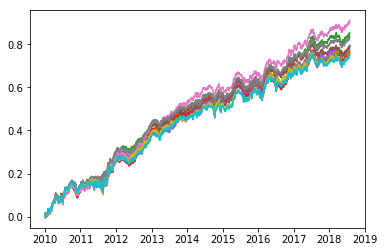

In [10]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()

In [11]:
df = rollup_returns(comb.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,0.000000,0.000000,0.000000,0.000000,0.000000
2010,0.073937,0.000026,0.084804,-0.026324,0.132443
2011,0.027336,0.018712,0.003185,0.104807,0.154041
2012,0.006546,0.001580,0.045012,0.086163,0.139301
2013,-0.026818,0.033855,0.036765,0.007212,0.051013
2014,0.030745,0.019516,-0.018858,0.030476,0.061879
2015,0.002274,0.057926,-0.031815,0.030318,0.058702
2016,0.051146,-0.023751,0.017671,0.032772,0.077838
2017,0.032360,0.058390,-0.036370,0.006928,0.061308


In [12]:
df.year.iloc[:-1].mean()

0.0818362488138581

In [13]:
comb.best_results_returns.iloc[-20:].sum()

0    0.020976
1    0.021184
2    0.020077
3    0.020484
4    0.019279
5    0.021642
6    0.020712
7    0.019324
8    0.020986
9    0.022246
dtype: float64

In [14]:
comb.best_results_returns.index.max()

Timestamp('2018-07-31 00:00:00')